# 3.1 Preprocessing and Training

Now that we've explored our data thoroughly and identified the desired features to use in our model, we'll go ahead and start getting our data ready for modeling. Several dependencies to load here!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay, roc_auc_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
from sklearn.multiclass import OneVsOneClassifier

import itertools

from itertools import cycle
from sklearn import svm, datasets

from sklearn.preprocessing import label_binarize
from sklearn.datasets import  make_classification

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import nltk
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier

In [2]:
song_data = pd.read_csv('song_data3.csv')

In [3]:
song_data.head()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,Genre
0,0,0.844,0.688,1,26.121,0,0.0490,0.01290,0.000054,0.0492,0.695,124.992,185662,House
1,1,0.602,0.910,7,30.596,1,0.0308,0.00126,0.000174,0.1200,0.228,127.944,140018,House
2,2,0.587,0.742,6,27.360,0,0.0529,0.01280,0.001070,0.1460,0.199,145.007,206000,House
3,3,0.561,0.965,7,30.327,0,0.0343,0.00383,0.000007,0.3710,0.304,128.040,175238,House
4,4,0.754,0.763,7,29.373,0,0.0435,0.03010,0.000022,0.0901,0.464,117.953,164819,House


In [4]:
song_data.shape

(400, 14)

In [5]:
song_data = song_data.loc[:, ~song_data.columns.str.contains('^Unnamed')]

In [6]:
song_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      400 non-null    float64
 1   energy            400 non-null    float64
 2   key               400 non-null    int64  
 3   loudness          400 non-null    float64
 4   mode              400 non-null    int64  
 5   speechiness       400 non-null    float64
 6   acousticness      400 non-null    float64
 7   instrumentalness  400 non-null    float64
 8   liveness          400 non-null    float64
 9   valence           400 non-null    float64
 10  tempo             400 non-null    float64
 11  duration_ms       400 non-null    int64  
 12  Genre             400 non-null    object 
dtypes: float64(9), int64(3), object(1)
memory usage: 40.8+ KB


In [7]:
song_data.shape

(400, 13)

In [8]:
song_data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,Genre
0,0.844,0.688,1,26.121,0,0.0490,0.01290,0.000054,0.0492,0.695,124.992,185662,House
1,0.602,0.910,7,30.596,1,0.0308,0.00126,0.000174,0.1200,0.228,127.944,140018,House
2,0.587,0.742,6,27.360,0,0.0529,0.01280,0.001070,0.1460,0.199,145.007,206000,House
3,0.561,0.965,7,30.327,0,0.0343,0.00383,0.000007,0.3710,0.304,128.040,175238,House
4,0.754,0.763,7,29.373,0,0.0435,0.03010,0.000022,0.0901,0.464,117.953,164819,House


Adding time signature and song name back in. I doubt time signature will be a useful feature due to its very small variability, but the values that are different may hold some predictive power. Also, we can go ahead and see if our song titles can improve our predictions via the tlnk module, using NLP.

In [9]:
song_data2 = pd.read_csv('~\Documents\SpringboardNew\song_data.csv')
song_data['time_signature'] = np.array(song_data2['time_signature'])
song_data['song_name'] = np.array(song_data2.iloc[:,0])
song_data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,Genre,time_signature,song_name
0,0.844,0.688,1,26.121,0,0.0490,0.01290,0.000054,0.0492,0.695,124.992,185662,House,4,Ferrari
1,0.602,0.910,7,30.596,1,0.0308,0.00126,0.000174,0.1200,0.228,127.944,140018,House,4,Baby Don't Hurt Me
2,0.587,0.742,6,27.360,0,0.0529,0.01280,0.001070,0.1460,0.199,145.007,206000,House,4,Miss You
3,0.561,0.965,7,30.327,0,0.0343,0.00383,0.000007,0.3710,0.304,128.040,175238,House,4,I'm Good (Blue)
4,0.754,0.763,7,29.373,0,0.0435,0.03010,0.000022,0.0901,0.464,117.953,164819,House,4,The Motto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.793,0.440,7,28.365,1,0.0370,0.23400,0.000373,0.0875,0.187,120.023,196062,Electro,4,Better Time
396,0.672,0.955,8,28.234,0,0.0434,0.00626,0.518000,0.2700,0.255,126.020,194286,Electro,4,Take My Love
397,0.680,0.841,0,27.970,1,0.0395,0.00562,0.000081,0.1420,0.190,123.029,227562,Electro,4,Good Life - feat. mimiko
398,0.616,0.869,11,29.836,1,0.0584,0.04360,0.000002,0.0803,0.286,128.050,183750,Electro,4,All or Nothing


In [10]:
def preprocess_text(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [word for word in tokens if word not in string.punctuation]
    return ' '.join(tokens)


In [11]:
#song_data['preprocessed_name'] = song_data['song_name'].apply(preprocess_text)

In [12]:
song_data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,Genre,time_signature,song_name
0,0.844,0.688,1,26.121,0,0.0490,0.01290,0.000054,0.0492,0.695,124.992,185662,House,4,Ferrari
1,0.602,0.910,7,30.596,1,0.0308,0.00126,0.000174,0.1200,0.228,127.944,140018,House,4,Baby Don't Hurt Me
2,0.587,0.742,6,27.360,0,0.0529,0.01280,0.001070,0.1460,0.199,145.007,206000,House,4,Miss You
3,0.561,0.965,7,30.327,0,0.0343,0.00383,0.000007,0.3710,0.304,128.040,175238,House,4,I'm Good (Blue)
4,0.754,0.763,7,29.373,0,0.0435,0.03010,0.000022,0.0901,0.464,117.953,164819,House,4,The Motto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.793,0.440,7,28.365,1,0.0370,0.23400,0.000373,0.0875,0.187,120.023,196062,Electro,4,Better Time
396,0.672,0.955,8,28.234,0,0.0434,0.00626,0.518000,0.2700,0.255,126.020,194286,Electro,4,Take My Love
397,0.680,0.841,0,27.970,1,0.0395,0.00562,0.000081,0.1420,0.190,123.029,227562,Electro,4,Good Life - feat. mimiko
398,0.616,0.869,11,29.836,1,0.0584,0.04360,0.000002,0.0803,0.286,128.050,183750,Electro,4,All or Nothing


In [13]:
pd.set_option('display.max_columns', 500)

In [14]:
song_data = pd.get_dummies(song_data, columns=['key', 'time_signature'])
genre_to_num = [0,1,2,3,4,5,6,7]
song_data['preprocessed_name'] = song_data['song_name'].apply(preprocess_text)
song_data = song_data.drop('song_name', axis=1)

In [15]:
list_genres2 = ['House', 'Trance', 'Techno', 'DnB', 'Dubstep', 'IDM', 'Synthwave', 'Electro']
list_features = list(song_data.loc[:, 'danceability':'duration_ms'].drop('mode', axis=1).columns)
list_features

['danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms']

In [16]:
X = song_data.drop(['Genre'], axis=1)
y = song_data['Genre'].replace(list_genres2, genre_to_num, inplace=False)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('bow', CountVectorizer(), 'preprocessed_name'),
        ('scaler', StandardScaler(), list_features)
    ],
    remainder='passthrough'
)

# Combine features and train a Random Forest classifier
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(score_func=f_classif)),
    ('classifier', RandomForestClassifier(),
    )
])

# Train model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)

# Calculate test statistics
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.69      0.64        13
           1       1.00      0.54      0.70        13
           2       0.73      0.73      0.73        11
           3       0.62      0.71      0.67         7
           4       0.86      0.75      0.80         8
           5       0.62      0.80      0.70        10
           6       0.25      0.40      0.31         5
           7       0.45      0.38      0.42        13

    accuracy                           0.62        80
   macro avg       0.64      0.63      0.62        80
weighted avg       0.67      0.62      0.63        80



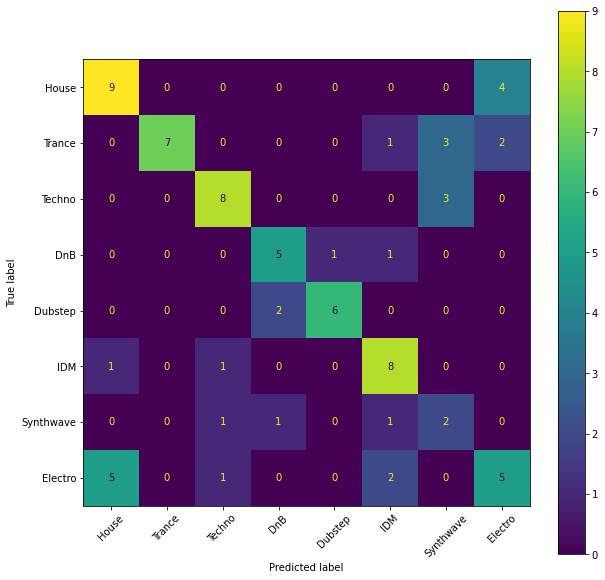

In [18]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list_genres2)
disp.plot()

fig = disp.figure_
fig.set_figwidth(10)
fig.set_figheight(10) 

plt.xticks(rotation=45)
plt.show()

In [19]:
X_data = pd.concat([X_train, X_test], ignore_index=True)
X_data

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5,preprocessed_name
0,0.561,0.965,30.327,0,0.0343,0.003830,0.000007,0.3710,0.3040,128.040,175238,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,i 'm good blue
1,0.639,0.904,29.764,0,0.0533,0.051300,0.000033,0.0862,0.5380,125.914,164286,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,someone better
2,0.573,0.978,32.991,1,0.0883,0.000685,0.062100,0.1690,0.0816,149.978,221600,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,laserbeam
3,0.599,0.406,14.119,0,0.0368,0.822000,0.933000,0.1120,0.3260,134.762,547133,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,tha
4,0.789,0.684,19.482,1,0.1420,0.813000,0.933000,0.4430,0.6550,133.013,59267,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,tak 4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.472,0.979,32.729,0,0.0430,0.047400,0.000320,0.1280,0.5700,149.991,193600,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,play with fire
396,0.599,0.912,31.627,0,0.0429,0.000033,0.018800,0.2470,0.0385,112.517,166400,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,death waltz
397,0.493,0.607,26.814,1,0.0333,0.228000,0.045200,0.1290,0.1470,77.993,172320,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,gon na be good
398,0.841,0.883,34.191,1,0.4100,0.180000,0.000005,0.1800,0.6060,137.052,216355,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,dead you


In [20]:
X_data

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5,preprocessed_name
0,0.561,0.965,30.327,0,0.0343,0.003830,0.000007,0.3710,0.3040,128.040,175238,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,i 'm good blue
1,0.639,0.904,29.764,0,0.0533,0.051300,0.000033,0.0862,0.5380,125.914,164286,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,someone better
2,0.573,0.978,32.991,1,0.0883,0.000685,0.062100,0.1690,0.0816,149.978,221600,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,laserbeam
3,0.599,0.406,14.119,0,0.0368,0.822000,0.933000,0.1120,0.3260,134.762,547133,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,tha
4,0.789,0.684,19.482,1,0.1420,0.813000,0.933000,0.4430,0.6550,133.013,59267,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,tak 4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.472,0.979,32.729,0,0.0430,0.047400,0.000320,0.1280,0.5700,149.991,193600,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,play with fire
396,0.599,0.912,31.627,0,0.0429,0.000033,0.018800,0.2470,0.0385,112.517,166400,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,death waltz
397,0.493,0.607,26.814,1,0.0333,0.228000,0.045200,0.1290,0.1470,77.993,172320,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,gon na be good
398,0.841,0.883,34.191,1,0.4100,0.180000,0.000005,0.1800,0.6060,137.052,216355,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,dead you


In [21]:
X2 = np.array(X.columns)
X2

array(['danceability', 'energy', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'key_0', 'key_1', 'key_2', 'key_3', 'key_4',
       'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11',
       'time_signature_0', 'time_signature_1', 'time_signature_3',
       'time_signature_4', 'time_signature_5', 'preprocessed_name'],
      dtype=object)

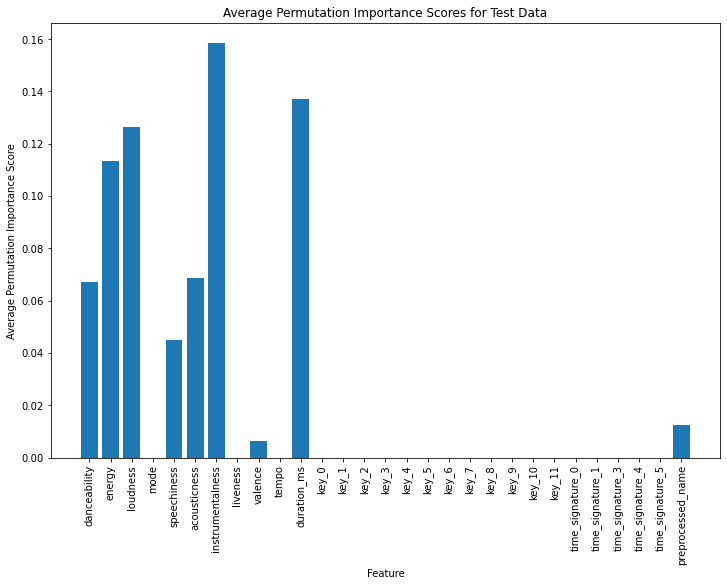

In [22]:
rfr_total = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)
plt.figure(figsize=(12,8))
plt.bar(np.array(X.columns), rfr_total['importances_mean'])
plt.title('Average Permutation Importance Scores for Test Data')
plt.xlabel('Feature')
plt.ylabel('Average Permutation Importance Score')
plt.xticks(rotation=90)
plt.show()

In [23]:
auc1 = roc_auc_score(y_test,y_pred_prob, multi_class='ovo')
auc1

0.9246677052343261

In [24]:
print(y_test.shape, y_pred_prob.shape)

(80,) (80, 8)


In [25]:
columns_to_transform = ['preprocessed_name']

# Apply the ColumnTransformer to your data
transformed_data = preprocessor.fit_transform(X_data)

# Convert the result to a DataFrame
transformed_df = pd.DataFrame(transformed_data, columns=columns_to_transform + [col for col in X_data.columns if col not in X_data.columns])


# Put these values on name for our data
X_data = X_data.drop('preprocessed_name', axis=1)
scaled_X = StandardScaler().fit_transform(X_data)

X_data['name'] = transformed_df.values


In [26]:
def plot_roc_curve(y_test, y_pred):
    n_classes = len(np.unique(y_test))
    y_test = label_binarize(y_test, classes=np.arange(n_classes))

    # Compute ROC curve ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    thresholds = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], thresholds[i] = roc_curve(y_test[:, i], y_pred_prob[:, i], drop_intermediate=False)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred_prob.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

     # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

     # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

     # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

     # Plot all ROC curves
     #plt.figure(figsize=(10,5))
    plt.figure(dpi=600)
    lw = 2
    plt.plot(fpr["micro"], tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink", linestyle=":", linewidth=4,)

    plt.plot(fpr["macro"], tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy", linestyle=":", linewidth=4,)

    colors = cycle(["aqua", "darkorange", "darkgreen", "yellow", "blue"])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),)

    plt.plot([0, 1], [0, 1], "k--", lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) curve")
    plt.legend(loc='best', fontsize='x-small')

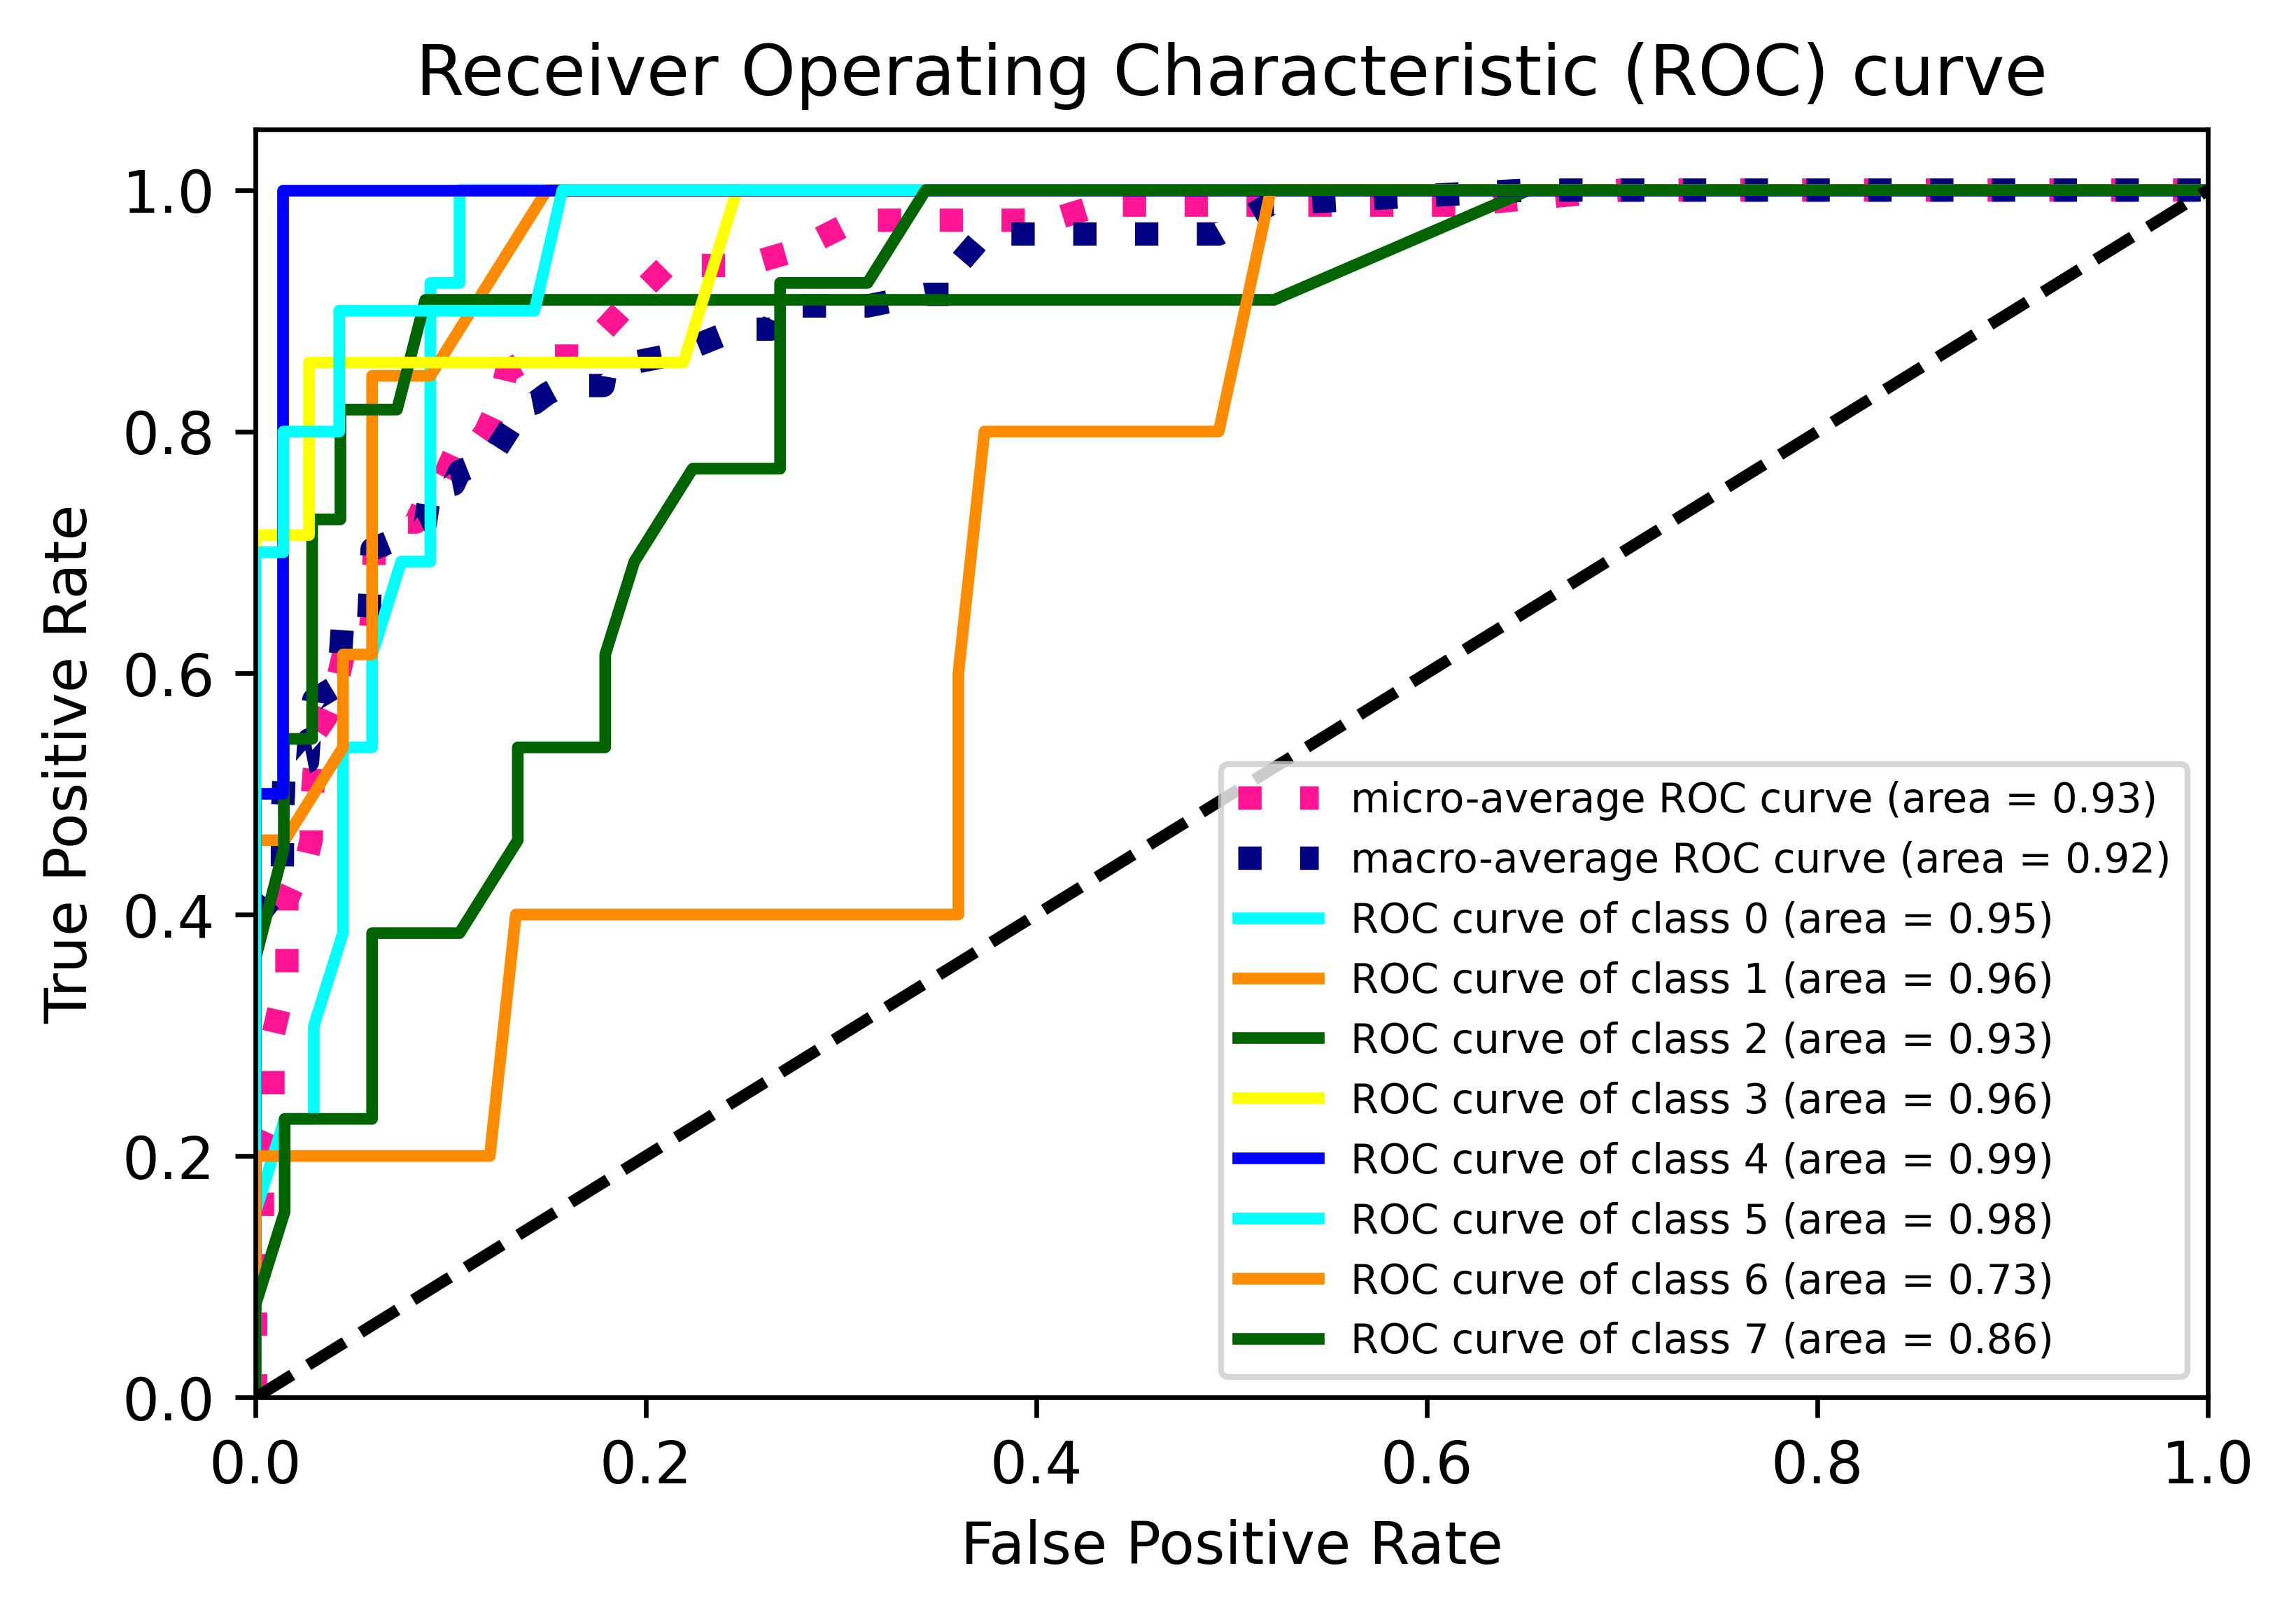

In [27]:
plot_roc_curve(y_test, y_pred)

In [28]:
data_noy = song_data.drop(['Genre', 'preprocessed_name'], axis=1)
scaled_song = StandardScaler().fit_transform(data_noy)
scaled_song

array([[ 1.62595931, -0.69134104, -0.31871663, ..., -0.19044535,
         0.22941573, -0.05006262],
       [-0.1162878 ,  0.61678995,  0.79431398, ..., -0.19044535,
         0.22941573, -0.05006262],
       [-0.22427832, -0.37314702, -0.01055016, ..., -0.19044535,
         0.22941573, -0.05006262],
       ...,
       [ 0.44526293,  0.2102087 ,  0.14117021, ..., -0.19044535,
         0.22941573, -0.05006262],
       [-0.01549664,  0.37519819,  0.60528532, ..., -0.19044535,
         0.22941573, -0.05006262],
       [ 0.1572882 ,  1.09408099,  0.776406  , ..., -0.19044535,
         0.22941573, -0.05006262]])

C:\Users\JAMESBOULESDAKEEK\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


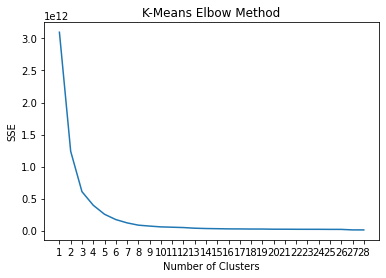

In [29]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 42,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, len(X_data.columns)):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_data.drop('name', axis=1))
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, len(X_data.columns)), sse)
plt.xticks(range(1, len(X_data.columns)))
plt.title('K-Means Elbow Method')
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

X_data

In [30]:
song_data

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,Genre,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5,preprocessed_name
0,0.844,0.688,26.121,0,0.0490,0.01290,0.000054,0.0492,0.695,124.992,185662,House,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,ferrari
1,0.602,0.910,30.596,1,0.0308,0.00126,0.000174,0.1200,0.228,127.944,140018,House,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,baby do n't hurt me
2,0.587,0.742,27.360,0,0.0529,0.01280,0.001070,0.1460,0.199,145.007,206000,House,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,miss you
3,0.561,0.965,30.327,0,0.0343,0.00383,0.000007,0.3710,0.304,128.040,175238,House,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,i 'm good blue
4,0.754,0.763,29.373,0,0.0435,0.03010,0.000022,0.0901,0.464,117.953,164819,House,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,the motto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.793,0.440,28.365,1,0.0370,0.23400,0.000373,0.0875,0.187,120.023,196062,Electro,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,better time
396,0.672,0.955,28.234,0,0.0434,0.00626,0.518000,0.2700,0.255,126.020,194286,Electro,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,take my love
397,0.680,0.841,27.970,1,0.0395,0.00562,0.000081,0.1420,0.190,123.029,227562,Electro,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,good life feat mimiko
398,0.616,0.869,29.836,1,0.0584,0.04360,0.000002,0.0803,0.286,128.050,183750,Electro,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,all or nothing


In [31]:
X_data

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5,name
0,0.561,0.965,30.327,0,0.0343,0.003830,0.000007,0.3710,0.3040,128.040,175238,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,"(0, 84)\t1.0\n (0, 248)\t1.0\n (0, 648)\t-..."
1,0.639,0.904,29.764,0,0.0533,0.051300,0.000033,0.0862,0.5380,125.914,164286,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,"(0, 78)\t1.0\n (0, 518)\t1.0\n (0, 648)\t0..."
2,0.573,0.978,32.991,1,0.0883,0.000685,0.062100,0.1690,0.0816,149.978,221600,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,"(0, 315)\t1.0\n (0, 648)\t-0.32506947328539..."
3,0.599,0.406,14.119,0,0.0368,0.822000,0.933000,0.1120,0.3260,134.762,547133,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,"(0, 559)\t1.0\n (0, 648)\t-0.13788589971980..."
4,0.789,0.684,19.482,1,0.1420,0.813000,0.933000,0.4430,0.6550,133.013,59267,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,"(0, 554)\t1.0\n (0, 648)\t1.229994060951803..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.472,0.979,32.729,0,0.0430,0.047400,0.000320,0.1280,0.5700,149.991,193600,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,"(0, 218)\t1.0\n (0, 436)\t1.0\n (0, 631)\t..."
396,0.599,0.912,31.627,0,0.0429,0.000033,0.018800,0.2470,0.0385,112.517,166400,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,"(0, 151)\t1.0\n (0, 615)\t1.0\n (0, 648)\t..."
397,0.493,0.607,26.814,1,0.0333,0.228000,0.045200,0.1290,0.1470,77.993,172320,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,"(0, 71)\t1.0\n (0, 247)\t1.0\n (0, 248)\t1..."
398,0.841,0.883,34.191,1,0.4100,0.180000,0.000005,0.1800,0.6060,137.052,216355,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,"(0, 150)\t1.0\n (0, 640)\t1.0\n (0, 648)\t..."


In [32]:
model2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KMeans(),
    )
])

I need to take a second look at these keys to figure out which grid parameters I want to use for hyperparameter tuning.

In [33]:
model.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'feature_selection', 'classifier', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__verbose_feature_names_out', 'preprocessor__bow', 'preprocessor__scaler', 'preprocessor__bow__analyzer', 'preprocessor__bow__binary', 'preprocessor__bow__decode_error', 'preprocessor__bow__dtype', 'preprocessor__bow__encoding', 'preprocessor__bow__input', 'preprocessor__bow__lowercase', 'preprocessor__bow__max_df', 'preprocessor__bow__max_features', 'preprocessor__bow__min_df', 'preprocessor__bow__ngram_range', 'preprocessor__bow__preprocessor', 'preprocessor__bow__stop_words', 'preprocessor__bow__strip_accents', 'preprocessor__bow__token_pattern', 'preprocessor__bow__tokenizer', 'preprocessor__bow__vocabulary', 'preprocessor__scaler__copy', 'preprocessor__scaler__with_mean', 'preprocessor__scaler__with_std'

In [34]:
k = [k+1 for k in range(len(X_train.columns))]
grid_params = {'feature_selection__k': k}

In [35]:
rfr_gridcv = GridSearchCV(model, param_grid=grid_params, cv=5, n_jobs=-1)
rfr_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('bow',
                                                                         CountVectorizer(),
                                                                         'preprocessed_name'),
                                                                        ('scaler',
                                                                         StandardScaler(),
                                                                         ['danceability',
                                                                          'energy',
                                                                          'loudness',
                                                                          'speechiness',
                                                    

In [36]:
rf_default_cv_results = cross_validate(model, X_train, y_train, cv=5)

C:\Users\JAMESBOULESDAKEEK\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0 0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\JAMESBOULESDAKEEK\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [37]:
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([0.71875, 0.53125, 0.5    , 0.5625 , 0.46875])

In [38]:
rf_best_cv_results = cross_validate(rfr_gridcv.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

C:\Users\JAMESBOULESDAKEEK\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0 0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\JAMESBOULESDAKEEK\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


array([0.671875, 0.640625, 0.609375, 0.625   , 0.546875])

In [39]:
score_mean = rfr_gridcv.cv_results_['mean_test_score']
score_std = rfr_gridcv.cv_results_['std_test_score']
cv_k = [k for k in rfr_gridcv.cv_results_['param_feature_selection__k']]

In [40]:
rfr_gridcv.best_params_

{'feature_selection__k': 18}

In [41]:
score_mean = rfr_gridcv.cv_results_['mean_test_score']
score_std = rfr_gridcv.cv_results_['std_test_score']
cv_k = [k for k in rfr_gridcv.cv_results_['param_feature_selection__k']]

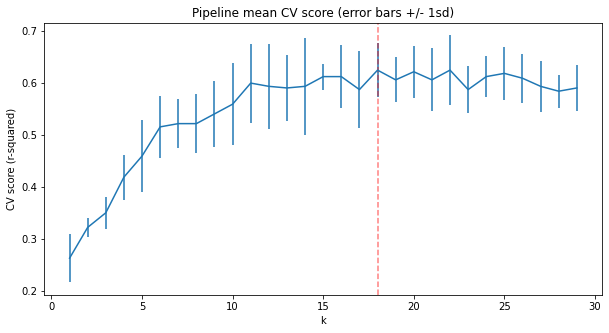

In [42]:
best_k = rfr_gridcv.best_params_['feature_selection__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

In [43]:
selected = rfr_gridcv.best_estimator_.named_steps.feature_selection.get_support()

In [44]:
#y_tr_pred = model.predict(X_train)
#y_te_pred = model.predict(X_test)

In [45]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(0.55625, 0.08705242673240074)

I see some good hyperparameterization options above, but I don't want too many - so I'll limit it to n_estimators and max_depth.

In [46]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {
        'classifier__n_estimators': n_est,
        'classifier__max_depth': [3,5,6,7,8],
        'feature_selection__k': [29]
}
grid_params

{'classifier__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'classifier__max_depth': [3, 5, 6, 7, 8],
 'feature_selection__k': [29]}

In [47]:
rf_grid_cv = GridSearchCV(model, param_grid=grid_params, cv=5, n_jobs=-1)

In [48]:
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('bow',
                                                                         CountVectorizer(),
                                                                         'preprocessed_name'),
                                                                        ('scaler',
                                                                         StandardScaler(),
                                                                         ['danceability',
                                                                          'energy',
                                                                          'loudness',
                                                                          'speechiness',
                                                    

In [49]:
rf_grid_cv.best_params_

{'classifier__max_depth': 5,
 'classifier__n_estimators': 615,
 'feature_selection__k': 29}

Great! Now let's see how our model did:

In [50]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

C:\Users\JAMESBOULESDAKEEK\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0 0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\JAMESBOULESDAKEEK\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


array([0.6875  , 0.546875, 0.578125, 0.6875  , 0.53125 ])

Pretty reasonable predictive power overall! While I was hoping for slightly better performance from this one, it certainly beats a random guess. I wonder how it would perform compared to the average human?

In [51]:
np.mean(rf_best_scores), np.std(rf_best_scores)

(0.60625, 0.06803606580336638)

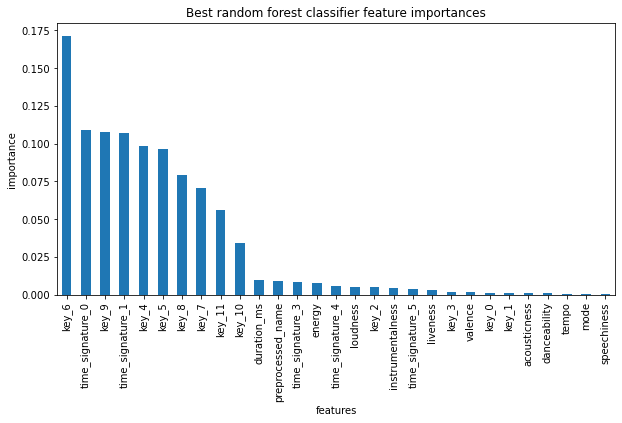

In [52]:
plt.subplots(figsize=(10, 5))
imps = rf_grid_cv.best_estimator_.named_steps.classifier.feature_importances_
num_top_features = len(imps)
top_feature_names = X_train.columns[:29]

rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest classifier feature importances');

Alright! The model ended up doing fairly well with a mean best score of 0.621 and stddev of 0.059. For an eight class classification of very similar genres, it is likely not terribly far from being a useful tool!
<br><br>
It's quite interesting that key ended up being a very strong predictor of genre. There is some diversity in the dataset - for instance, techno thrives on minor keys, and there are definitely minor keys that are heavily favored in general, such as A minor. However, trance is much happier in general and tends to go for the common major keys, notably C (key 10).
<br><br>
Let's try another model!

In [53]:
knn = Pipeline(steps=[
    #('preprocessor', preprocessor),
    ('scaler', StandardScaler()),     
    ('knn', KNeighborsClassifier())
])



In [54]:
knn.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'knn', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'knn__algorithm', 'knn__leaf_size', 'knn__metric', 'knn__metric_params', 'knn__n_jobs', 'knn__n_neighbors', 'knn__p', 'knn__weights'])

In [55]:
knn

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [56]:
X_train3 = X_train.drop('preprocessed_name', axis=1)

In [57]:
X_test3 = X_test.drop('preprocessed_name', axis=1)

In [58]:
train_scores2 = []
test_scores2 = []

#knn = KNeighborsClassifier(8)
knn.fit(X_train3, y_train)

train_scores2.append(knn.score(X_train3, y_train))
test_scores2.append(knn.score(X_test3, y_test))

In [59]:
y_pred = knn.predict(X_test3)
y_pred_prob = knn.predict_proba(X_test3)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.62      0.42        13
           1       0.38      0.38      0.38        13
           2       0.83      0.45      0.59        11
           3       0.50      0.14      0.22         7
           4       0.27      0.38      0.32         8
           5       0.80      0.40      0.53        10
           6       0.10      0.20      0.13         5
           7       0.00      0.00      0.00        13

    accuracy                           0.34        80
   macro avg       0.40      0.32      0.32        80
weighted avg       0.41      0.34      0.34        80



In [60]:
X_train2 = X_train.drop('preprocessed_name', axis=1)

In [61]:
X_test2 = X_test.drop('preprocessed_name', axis=1)

In [62]:
#X_train2['song_name'] = transformed_df.values[:320]
#X_train2 = X_train2.drop('song_name', axis=1)

In [63]:
train_scores = []
test_scores = []

knn2 = KNeighborsClassifier(8)
knn2.fit(X_train2, y_train)
    
train_scores.append(knn2.score(X_train2, y_train))
test_scores.append(knn2.score(X_test2, y_test))

In [64]:
print(np.round(train_scores, 4))
print(np.round(test_scores, 4))

[0.3812]
[0.3]


In [65]:
grid_params = {
        'knn__leaf_size': [20,30,40,50,60,100],
        'knn__algorithm': ['brute', 'auto']
}
grid_params

{'knn__leaf_size': [20, 30, 40, 50, 60, 100],
 'knn__algorithm': ['brute', 'auto']}

In [66]:
knn_gridcv = GridSearchCV(knn, param_grid=grid_params, cv=5, n_jobs=-1)

In [67]:
knn_gridcv.fit(X_train2, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__algorithm': ['brute', 'auto'],
                         'knn__leaf_size': [20, 30, 40, 50, 60, 100]})

In [69]:
knn_gridcv.best_params_

{'knn__algorithm': 'brute', 'knn__leaf_size': 20}

In [70]:
knn_best_cv_results = cross_validate(knn_gridcv.best_estimator_, X_train2, y_train, cv=5)
knn_best_scores = knn_best_cv_results['test_score']
knn_best_scores

array([0.265625, 0.3125  , 0.34375 , 0.421875, 0.21875 ])

# Model Comparison and Conclusions

After reviewing the test statistics, it's clear that the RandomForestClassifier outperformed the KNN model easily with an average accuracy value of about 0.60, while KNN struggled to reach up to 0.40.
<br><br>
As a baseline, we would expect a 0.125 probability to randomly guess a genre right (having 8 classes), but to make this a useful feature, we'll have to beat out the average human, who is likely at least 2-3x more accurate than randomly guessing, assuming they are familiar with the genres.
<br><br>
To improve our approach and modeling, we could certainly get more data in data collection, trying out a neural network seems like it could yield promising results with enough data (which, with song data, is very easy to achieve). Furthermore, we could try more feature engineering, but that may be out of reach without having more information about how these variables interplay.